In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("match_df.csv")

In [3]:
df = df.drop("Unnamed: 0",axis = 1)
df = df.drop("Unnamed: 0.1",axis = 1)

In [4]:
df

,match_id,player,opponent,year,month,day,rankdiff,rankdist,wikibuzz,inv_bet365,inv_avg,inv_max,encoded_tournament,win
0,12773,Casey Dellacqua,Elina Svitolina,2015.0,7.0,2.0,44.0,0.042430,0.000000,0.546448,0.537634,0.518135,120,1
1,12774,Camila Giorgi,Lara Arruabarrena,2015.0,7.0,2.0,-53.0,-0.019485,0.000000,0.900901,0.892857,0.877193,120,1
2,12775,Olga Govortsova,Alize Cornet,2015.0,7.0,2.0,95.0,0.028840,0.000000,0.476191,0.465116,0.444444,120,1
3,12776,Jelena Jankovic,Evgeniya Rodina,2015.0,7.0,2.0,-71.0,-0.023432,0.000000,0.819672,0.813008,0.793651,120,1
4,12777,Angelique Kerber,Anastasia Pavlyuchenkova,2015.0,7.0,2.0,-32.0,-0.076190,0.000000,0.862069,0.877193,0.847458,120,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20927,4139,Ekaterina Alexandrova,Kiki Bertens,2020.0,2.0,15.0,20.0,0.089286,1.323982,0.500000,0.483092,0.454545,70,0
20928,4141,Patricia Maria Tig,Magda Linette,2020.0,2.0,15.0,63.0,0.014286,-0.517943,0.381679,0.396825,0.378788,108,0
20929,4142,Maria Sakkari,Elena Rybakina,2020.0,2.0,15.0,-4.0,-0.007619,-1.612937,0.421941,0.431034,0.408163,70,0
20930,4143,Kiki Bertens,Elena Rybakina,2020.0,2.0,16.0,-17.0,-0.085000,-2.935837,0.636943,0.641026,0.621118,70,1


In [78]:
df.head(1)

,match_id,player,opponent,year,month,day,rankdiff,rankdist,wikibuzz,inv_bet365,inv_avg,inv_max,encoded_tournament,win
0,12773,Casey Dellacqua,Elina Svitolina,2015.0,7.0,2.0,44.0,0.04243,0.0,0.546448,0.537634,0.518135,120,1


In [16]:
player = "Elina Svitolina"
year = 2015
month = 7
monthly = pd.read_csv("players 2014-2022/Elina Svitolina.csv")
daily = pd.read_csv("players/Elina Svitolina/2015_7_Elina Svitolina.csv")

In [30]:
monthly["date"] = pd.to_datetime(monthly["date"])
monthly.loc[monthly["date"]=="2015-07-01"]

,date,Elina Svitolina,isPartial
18,2015-07-01,2,False


In [36]:
monthly = monthly[monthly["date"]<="2015-07-01"]
monthly = monthly[monthly["date"]>="2014-07-01"]
max_month = monthly["Elina Svitolina"].max()
month_scaler = 100/max_month
monthly["Elina Svitolina"] = monthly["Elina Svitolina"]*month_scaler
monthly

,date,Elina Svitolina,isPartial
6,2014-07-01,33.333333,False
7,2014-08-01,33.333333,False
8,2014-09-01,33.333333,False
9,2014-10-01,25.000000,False
10,2014-11-01,8.333333,False
11,2014-12-01,0.000000,False
12,2015-01-01,75.000000,False
13,2015-02-01,33.333333,False
14,2015-03-01,25.000000,False
15,2015-04-01,25.000000,False


In [70]:
daily = pd.read_csv("players/Elina Svitolina/2015_7_Elina Svitolina.csv")
daily_mean = daily["Elina Svitolina"].mean()
daily_scaler = float(monthly.loc[monthly["date"]=="2015-07-01"]["Elina Svitolina"])/daily_mean
daily["Elina Svitolina"] = daily["Elina Svitolina"]*daily_scaler
daily

,date,Elina Svitolina,isPartial
0,2015-07-01,38.492480,False
1,2015-07-02,42.829661,False
2,2015-07-03,41.745366,False
3,2015-07-04,33.071004,False
4,2015-07-05,17.890871,False
5,2015-07-06,0.000000,False
6,2015-07-07,35.781742,False
7,2015-07-08,0.000000,False
8,2015-07-09,0.000000,False
9,2015-07-10,0.000000,False


In [131]:
player = "Casey Dellacqua"
year = 2015
month = 7
monthly = pd.read_csv("players 2014-2022/Casey Dellacqua.csv")
daily = pd.read_csv("players/Casey Dellacqua/2015_7_Casey Dellacqua.csv")
monthly["date"] = pd.to_datetime(monthly["date"])
monthly.loc[monthly["date"]=="2015-07-01"]
monthly = monthly[monthly["date"]<="2015-07-01"]
monthly = monthly[monthly["date"]>="2014-07-01"]
max_month = monthly["Casey Dellacqua"].max()
#print(max_month)
month_scaler = 100/max_month
monthly["Casey Dellacqua"] = monthly["Casey Dellacqua"]*month_scaler
#print(monthly)
daily = pd.read_csv("players/Casey Dellacqua/2015_7_Casey Dellacqua.csv")
daily_mean = daily["Casey Dellacqua"].mean()
print(daily_mean)
daily_scaler = float(monthly.loc[monthly["date"]=="2015-07-01"]["Casey Dellacqua"])/daily_mean
daily["Casey Dellacqua"] = daily["Casey Dellacqua"]*daily_scaler
daily["Casey Dellacqua"][0]

8.774193548387096


43.60613810741688

In [81]:
np.log(43.606138) - np.log(38.492480)

0.12473502272288917

## Test

In [9]:
test = df
test

,match_id,player,opponent,year,month,day,rankdiff,rankdist,wikibuzz,inv_bet365,inv_avg,inv_max,encoded_tournament,win
0,12773,Casey Dellacqua,Elina Svitolina,2015.0,7.0,2.0,44.0,0.042430,0.000000,0.546448,0.537634,0.518135,120,1
1,12774,Camila Giorgi,Lara Arruabarrena,2015.0,7.0,2.0,-53.0,-0.019485,0.000000,0.900901,0.892857,0.877193,120,1
2,12775,Olga Govortsova,Alize Cornet,2015.0,7.0,2.0,95.0,0.028840,0.000000,0.476191,0.465116,0.444444,120,1
3,12776,Jelena Jankovic,Evgeniya Rodina,2015.0,7.0,2.0,-71.0,-0.023432,0.000000,0.819672,0.813008,0.793651,120,1
4,12777,Angelique Kerber,Anastasia Pavlyuchenkova,2015.0,7.0,2.0,-32.0,-0.076190,0.000000,0.862069,0.877193,0.847458,120,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20927,4139,Ekaterina Alexandrova,Kiki Bertens,2020.0,2.0,15.0,20.0,0.089286,1.323982,0.500000,0.483092,0.454545,70,0
20928,4141,Patricia Maria Tig,Magda Linette,2020.0,2.0,15.0,63.0,0.014286,-0.517943,0.381679,0.396825,0.378788,108,0
20929,4142,Maria Sakkari,Elena Rybakina,2020.0,2.0,15.0,-4.0,-0.007619,-1.612937,0.421941,0.431034,0.408163,70,0
20930,4143,Kiki Bertens,Elena Rybakina,2020.0,2.0,16.0,-17.0,-0.085000,-2.935837,0.636943,0.641026,0.621118,70,1


In [237]:
missing_players = []
for player,opponent,year,month,day,win in zip(test["player"],test["opponent"],test["year"],test["month"],test["day"],test["win"]):
    player,opponent,year,month,day,win = str(player),str(opponent),int(year),int(month),int(day),int(win)
  #  print(player,opponent,year,month,day)
    prev_year = year-1
    try:
        player_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(player,year,month,player))
    except:
        print("players/{}/{}_{}_{}.csv".format(player,year,month,player))
        missing_players.append(tuple([player,year,month]))
    try:
        opp_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
    except:
        print("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
        missing_players.append(tuple([opponent,year,month]))
missing_players  

[]

In [238]:
missing_player_monthly = []
for player,opponent,year,month,day,win in zip(test["player"],test["opponent"],test["year"],test["month"],test["day"],test["win"]):
    player,opponent,year,month,day,win = str(player),str(opponent),int(year),int(month),int(day),int(win)
  #  print(player,opponent,year,month,day)
    prev_year = year-1
    try:
        player_daily = pd.read_csv("players 2014-2022/{}.csv".format(player))
    except:
        missing_player_monthly.append(tuple([player,year,month]))
    try:
        opp_daily = pd.read_csv("players 2014-2022/{}.csv".format(opponent))
    except:
        missing_player_monthly.append(tuple([opponent,year,month]))
missing_player_monthly

[]

In [228]:
missing = pd.DataFrame(missing_players)
missing = missing.drop_duplicates()
missing.to_csv("missing_values.csv")
missing

,0,1,2
0,Petra Cetkovska,2015,8
1,Mayo Hibi,2015,8
2,Lourdes Domínguez Lino,2015,8
3,Johanna Larsson,2015,8
4,Marina Erakovic,2015,8
...,...,...,...
395,Anastasia Potapova,2019,6
396,Jil Teichmann,2019,6
397,Anna Karolina Schmiedlova,2019,6
398,Kristie Ahn,2019,6


In [42]:
from calendar import monthrange

def CalculateGoogleBuzz(player,opponent,year,month,day,win):
    player,opponent,year,month,day,win = str(player),str(opponent),int(year),int(month),int(day),int(win)
  #  print(player,opponent,year,month,day)
   # print(player,year,month,day)
    prev_year = year-1
    if day == 1:
        if month == 1:
            month = 12
        else:
            month = month-1
        day = (monthrange(year, month))[1]
    else:
        day = day-1
    player_monthly = pd.read_csv("players 2014-2022/{}.csv".format(player))
    try:
        player_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(player,year,month,player))
    except:
        print("players/{}/{}_{}_{}.csv".format(player,year,month,player))
        return(np.nan)
    try:
        player_monthly["date"] = pd.to_datetime(player_monthly["date"])
    except:
        return(np.nan)
    player_monthly.loc[player_monthly["date"]=="{}-{}-01".format(year,month)]
    player_monthly = player_monthly[player_monthly["date"]<="{}-{}-01".format(year,month)]
    player_monthly = player_monthly[player_monthly["date"]>="{}-{}-01".format(prev_year,month)]
    player_max_month = player_monthly["{}".format(player)].max()
    try:
        player_month_scaler = 100/player_max_month
    except:
        return(np.nan)
    player_monthly["{}".format(player)] = player_monthly["{}".format(player)]*player_month_scaler
    try: 
        player_daily["date"] = pd.to_datetime(player_daily["date"])
    except:
        return(np.nan)
    player_daily_mean = player_daily["{}".format(player)].mean()
    try:
        player_daily_scaler = float(player_monthly.loc[player_monthly["date"]=="{}-{}-01".format(year,month)]["{}".format(player)])/player_daily_mean
    except:
        return(np.nan)
    player_daily["{}".format(player)] = player_daily["{}".format(player)]*player_daily_scaler
    player_GB = float(player_daily.loc[player_daily["date"]=="{}-{}-{}".format(year,month,day)]["{}".format(player)])
    
    opp_monthly = pd.read_csv("players 2014-2022/{}.csv".format(opponent))
    try:
        opp_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
    except:
        print("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
        return(np.nan)
    try:
        opp_monthly["date"] = pd.to_datetime(opp_monthly["date"])
    except:
        return(np.nan)
    opp_monthly.loc[opp_monthly["date"]=="{}-{}-01".format(year,month)]
    opp_monthly = opp_monthly[opp_monthly["date"]<="{}-{}-01".format(year,month)]
    opp_monthly = opp_monthly[opp_monthly["date"]>="{}-{}-01".format(prev_year,month)]
    opp_max_month = opp_monthly["{}".format(opponent)].max()
    try:
        opp_month_scaler = 100/opp_max_month
    except:
        return(np.nan)
    opp_monthly["{}".format(opponent)] = opp_monthly["{}".format(opponent)]*opp_month_scaler
    try:
        opp_daily["date"] = pd.to_datetime(opp_daily["date"])
    except:
        return(np.nan)
    opp_daily_mean = opp_daily["{}".format(opponent)].mean()
    opp_daily_scaler = float(opp_monthly.loc[opp_monthly["date"]=="{}-{}-01".format(year,month)]["{}".format(opponent)])/opp_daily_mean
    opp_daily["{}".format(opponent)] = opp_daily["{}".format(opponent)]*opp_daily_scaler
    opponent_GB = float(opp_daily.loc[opp_daily["date"]=="{}-{}-{}".format(year,month,day)]["{}".format(opponent)])
    if win == 1:
        GoogleBuzz = np.log(player_GB+1) - np.log(opponent_GB+1)
    else:
        GoogleBuzz = np.log(opponent_GB+1) - np.log(player_GB+1)
    return(GoogleBuzz)

In [11]:
def RevisedGoogleBuzz(player,opponent,year,month,day,win):
    player,opponent,year,month,day,win = str(player),str(opponent),int(year),int(month),int(day),int(win)
    prev_year = year-1
    if day == 1:
        if month == 1:
            month = 12
        else:
            month = month-1
        day = (monthrange(year, month))[1]
    else:
        day = day-1
    player_monthly = pd.read_csv("players 2014-2022/{}.csv".format(player))
    try:
        player_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(player,year,month,player))
    except:
        print("players/{}/{}_{}_{}.csv".format(player,year,month,player))
        return(np.nan)
    try:
        player_monthly["date"] = pd.to_datetime(player_monthly["date"])
    except:
        return(np.nan)
    player_monthly.loc[player_monthly["date"]=="{}-{}-01".format(year,month)]
    player_monthly = player_monthly[player_monthly["date"]<="{}-{}-01".format(year,month)]
    player_monthly = player_monthly[player_monthly["date"]>="{}-{}-01".format(prev_year,month)]
    player_max_month = player_monthly["{}".format(player)].max()
    try:
        player_month_scaler = 100/player_max_month
    except:
        return(np.nan)
    player_monthly["{}".format(player)] = player_monthly["{}".format(player)]*player_month_scaler
    try: 
        player_daily["date"] = pd.to_datetime(player_daily["date"])
    except:
        return(np.nan)
    player_daily_mean = player_daily["{}".format(player)].mean()
    try:
        player_daily_scaler = float(player_monthly.loc[player_monthly["date"]=="{}-{}-01".format(year,month)]["{}".format(player)])/player_daily_mean
    except:
        print(player,opponent,year,month,day)
        return(np.nan)
    player_daily["{}".format(player)] = player_daily["{}".format(player)]*player_daily_scaler
    player_GB = float(player_daily.loc[player_daily["date"]=="{}-{}-{}".format(year,month,day)]["{}".format(player)])
    
    opp_monthly = pd.read_csv("players 2014-2022/{}.csv".format(opponent))
    try:
        opp_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
    except:
        print("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
        return(np.nan)
    try:
        opp_monthly["date"] = pd.to_datetime(opp_monthly["date"])
    except:
        return(np.nan)
    opp_monthly.loc[opp_monthly["date"]=="{}-{}-01".format(year,month)]
    opp_monthly = opp_monthly[opp_monthly["date"]<="{}-{}-01".format(year,month)]
    opp_monthly = opp_monthly[opp_monthly["date"]>="{}-{}-01".format(prev_year,month)]
    opp_max_month = opp_monthly["{}".format(opponent)].max()
    try:
        opp_month_scaler = 100/opp_max_month
    except:
        return(np.nan)
    opp_monthly["{}".format(opponent)] = opp_monthly["{}".format(opponent)]*opp_month_scaler
    try:
        opp_daily["date"] = pd.to_datetime(opp_daily["date"])
    except:
        return(np.nan)
    opp_daily_mean = opp_daily["{}".format(opponent)].mean()
    opp_daily_scaler = float(opp_monthly.loc[opp_monthly["date"]=="{}-{}-01".format(year,month)]["{}".format(opponent)])/opp_daily_mean
    opp_daily["{}".format(opponent)] = opp_daily["{}".format(opponent)]*opp_daily_scaler
    opponent_GB = float(opp_daily.loc[opp_daily["date"]=="{}-{}-{}".format(year,month,day)]["{}".format(opponent)])
    if win == 1:
        GoogleBuzz = (player_GB) - (opponent_GB)
    else:
        GoogleBuzz = (opponent_GB) - (player_GB)
    return(GoogleBuzz)

In [231]:
missing_players = []
for player,opponent,year,month,day,win in zip((test["player"]),(test["opponent"]),(test["year"]),(test["month"]),(test["day"]),(test["win"])):
    player,opponent,year,month,day,win = str(player),str(opponent),int(year),int(month),int(day),int(win)
  #  print(player,opponent,year,month,day)
    prev_year = year-1
    if day == 1:
        if month == 1:
            month = 12
        else:
            month = month-1
        day = (monthrange(year, month))[1]
    else:
        day = day-1
    try:
        player_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(player,year,month,player))
    except:
        print("players/{}/{}_{}_{}.csv".format(player,year,month,player))
        missing_players.append(tuple([player,year,month]))
    try:
        opp_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
    except:
        print("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
        missing_players.append(tuple([opponent,year,month]))
missing_players

players/Alize Cornet/2017_12_Alize Cornet.csv
players/Elena Vesnina/2017_12_Elena Vesnina.csv
players/Misaki Doi/2017_12_Misaki Doi.csv
players/Ekaterina Makarova/2017_12_Ekaterina Makarova.csv
players/Daria Kasatkina/2017_12_Daria Kasatkina.csv
players/Irina-Camelia Begu/2017_12_Irina-Camelia Begu.csv
players/Vania King/2017_12_Vania King.csv
players/Maria Sakkari/2017_12_Maria Sakkari.csv
players/Christina McHale/2017_12_Christina McHale.csv
players/Sara Errani/2017_12_Sara Errani.csv
players/Kurumi Nara/2017_12_Kurumi Nara.csv
players/Antonia Lottner/2017_12_Antonia Lottner.csv
players/Tsvetana Pironkova/2017_12_Tsvetana Pironkova.csv
players/Galina Voskoboeva/2017_12_Galina Voskoboeva.csv
players/Karolina Pliskova/2017_12_Karolina Pliskova.csv
players/Yulia Putintseva/2017_12_Yulia Putintseva.csv
players/Shelby Rogers/2017_12_Shelby Rogers.csv
players/Eugenie Bouchard/2017_12_Eugenie Bouchard.csv
players/Lucie Safarova/2017_12_Lucie Safarova.csv
players/Denisa Allertova/2017_12_Den

players/Roberta Vinci/2018_1_Roberta Vinci.csv
players/Roberta Vinci/2018_1_Roberta Vinci.csv
players/Stefanie Voegele/2018_2_Stefanie Voegele.csv
players/Stefanie Voegele/2018_2_Stefanie Voegele.csv
players/Denisa Allertova/2018_4_Denisa Allertova.csv
players/Patty Schnyder/2018_4_Patty Schnyder.csv
players/Paula Badosa/2018_4_Paula Badosa.csv
players/Fiona Ferro/2018_4_Fiona Ferro.csv
players/Alexandra Dulgheru/2018_4_Alexandra Dulgheru.csv
players/Dominika Cibulkova/2018_4_Dominika Cibulkova.csv
players/Bethanie Mattek-Sands/2018_4_Bethanie Mattek-Sands.csv
players/Kristina Kucova/2018_4_Kristina Kucova.csv
players/Elena-Gabriela Ruse/2018_4_Elena-Gabriela Ruse.csv
players/Tamara Zidansek/2018_4_Tamara Zidansek.csv
players/Patty Schnyder/2018_4_Patty Schnyder.csv
players/Denisa Allertova/2018_4_Denisa Allertova.csv
players/Fiona Ferro/2018_4_Fiona Ferro.csv
players/Paula Badosa/2018_4_Paula Badosa.csv
players/Alexandra Dulgheru/2018_4_Alexandra Dulgheru.csv
players/Dominika Cibulkov

[('Alize Cornet', 2017, 12),
 ('Elena Vesnina', 2017, 12),
 ('Misaki Doi', 2017, 12),
 ('Ekaterina Makarova', 2017, 12),
 ('Daria Kasatkina', 2017, 12),
 ('Irina-Camelia Begu', 2017, 12),
 ('Vania King', 2017, 12),
 ('Maria Sakkari', 2017, 12),
 ('Christina McHale', 2017, 12),
 ('Sara Errani', 2017, 12),
 ('Kurumi Nara', 2017, 12),
 ('Antonia Lottner', 2017, 12),
 ('Tsvetana Pironkova', 2017, 12),
 ('Galina Voskoboeva', 2017, 12),
 ('Karolina Pliskova', 2017, 12),
 ('Yulia Putintseva', 2017, 12),
 ('Shelby Rogers', 2017, 12),
 ('Eugenie Bouchard', 2017, 12),
 ('Lucie Safarova', 2017, 12),
 ('Denisa Allertova', 2017, 12),
 ('Qiang Wang', 2017, 12),
 ('Evgeniya Rodina', 2017, 12),
 ('Elena Vesnina', 2017, 12),
 ('Alize Cornet', 2017, 12),
 ('Ekaterina Makarova', 2017, 12),
 ('Misaki Doi', 2017, 12),
 ('Irina-Camelia Begu', 2017, 12),
 ('Daria Kasatkina', 2017, 12),
 ('Maria Sakkari', 2017, 12),
 ('Vania King', 2017, 12),
 ('Sara Errani', 2017, 12),
 ('Christina McHale', 2017, 12),
 ('Ant

In [92]:
test = df
test["googlebuzz"] = [RevisedGoogleBuzz(player,opponent,year,month,day,win) for player,opponent,year,month,day,win in zip((test["player"]),(test["opponent"]),(test["year"]),(test["month"]),(test["day"]),(test["win"]))]

Nao Hibino Arina Rodionova 2020 2 9
Peangtarn Plipuech Chloe Paquet 2020 2 9
Anastasia Potapova Liudmila Samsonova 2020 2 9
Maria Sakkari Vitalia Diatchenko 2020 2 9
Storm Sanders Ulrikke Eikeri 2020 2 9
Arina Rodionova Nao Hibino 2020 2 9
Chloe Paquet Peangtarn Plipuech 2020 2 9
Liudmila Samsonova Anastasia Potapova 2020 2 9
Vitalia Diatchenko Maria Sakkari 2020 2 9
Ulrikke Eikeri Storm Sanders 2020 2 9
Ekaterina Alexandrova Daria Kasatkina 2020 2 10
Oceane Dodin Viktoria Kuzmova 2020 2 10
Fiona Ferro Caroline Garcia 2020 2 10
Barbara Haas Chihiro Muramatsu 2020 2 10
Katarzyna Kawa Ankita Raina 2020 2 10
Veronika Kudermetova Yulia Putintseva 2020 2 10
Svetlana Kuznetsova Jennifer Brady 2020 2 10
Ajla Tomljanovic Marketa Vondrousova 2020 2 10
Alison Van Uytvanck Kristina Mladenovic 2020 2 10
Donna Vekic Kristie Ahn 2020 2 10
Lin Zhu Varvara Flink 2020 2 10
Daria Kasatkina Ekaterina Alexandrova 2020 2 10
Viktoria Kuzmova Oceane Dodin 2020 2 10
Caroline Garcia Fiona Ferro 2020 2 10
Chihi

In [107]:
test["originalgooglebuzz"] = [CalculateGoogleBuzz(player,opponent,year,month,day,win) for player,opponent,year,month,day,win in zip((test["player"]),(test["opponent"]),(test["year"]),(test["month"]),(test["day"]),(test["win"]))]

In [93]:
test

,match_id,player,opponent,year,month,day,rankdiff,rankdist,wikibuzz,inv_bet365,inv_avg,inv_max,encoded_tournament,win,googlebuzz,originalgooglebuzz
0,12773,Casey Dellacqua,Elina Svitolina,2015.0,7.0,2.0,44.0,0.042430,0.000000,0.546448,0.537634,0.518135,120,1,5.113658,0.121761
1,12774,Camila Giorgi,Lara Arruabarrena,2015.0,7.0,2.0,-53.0,-0.019485,0.000000,0.900901,0.892857,0.877193,120,1,72.535035,4.297762
2,12775,Olga Govortsova,Alize Cornet,2015.0,7.0,2.0,95.0,0.028840,0.000000,0.476191,0.465116,0.444444,120,1,-43.494898,-3.795375
3,12776,Jelena Jankovic,Evgeniya Rodina,2015.0,7.0,2.0,-71.0,-0.023432,0.000000,0.819672,0.813008,0.793651,120,1,57.328767,4.066095
4,12777,Angelique Kerber,Anastasia Pavlyuchenkova,2015.0,7.0,2.0,-32.0,-0.076190,0.000000,0.862069,0.877193,0.847458,120,1,24.371069,3.233610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20927,4139,Ekaterina Alexandrova,Kiki Bertens,2020.0,2.0,15.0,20.0,0.089286,1.323982,0.500000,0.483092,0.454545,70,0,NaN,NaN
20928,4141,Patricia Maria Tig,Magda Linette,2020.0,2.0,15.0,63.0,0.014286,-0.517943,0.381679,0.396825,0.378788,108,0,NaN,NaN
20929,4142,Maria Sakkari,Elena Rybakina,2020.0,2.0,15.0,-4.0,-0.007619,-1.612937,0.421941,0.431034,0.408163,70,0,NaN,NaN
20930,4143,Kiki Bertens,Elena Rybakina,2020.0,2.0,16.0,-17.0,-0.085000,-2.935837,0.636943,0.641026,0.621118,70,1,NaN,NaN


In [46]:
test.to_csv("GoogleBuzzDF.csv")

In [108]:
test
test.isna().sum()

match_id                 0
player                   0
opponent                 0
year                     0
month                    0
day                      0
rankdiff                 0
rankdist                 0
wikibuzz                 0
inv_bet365               0
inv_avg                  0
inv_max                  0
encoded_tournament       0
win                      0
googlebuzz            2092
originalgooglebuzz    2092
dtype: int64

In [109]:
x=test
x.replace([np.inf, -np.inf], 0, inplace=True)
x.isna().sum()

match_id                 0
player                   0
opponent                 0
year                     0
month                    0
day                      0
rankdiff                 0
rankdist                 0
wikibuzz                 0
inv_bet365               0
inv_avg                  0
inv_max                  0
encoded_tournament       0
win                      0
googlebuzz            2092
originalgooglebuzz    2092
dtype: int64

In [110]:
x = x.dropna(axis=0)
google_df = x
google_df.loc[google_df["googlebuzz"]==0]

,match_id,player,opponent,year,month,day,rankdiff,rankdist,wikibuzz,inv_bet365,inv_avg,inv_max,encoded_tournament,win,googlebuzz,originalgooglebuzz
45,12797,Olga Govortsova,Magdalena Rybarikova,2015.0,7.0,4.0,57.0,0.007188,0.000000,0.434783,0.442478,0.420168,120,1,0.0,0.0
53,12797,Magdalena Rybarikova,Olga Govortsova,2015.0,7.0,4.0,-57.0,-0.007188,0.000000,0.621118,0.613497,0.571429,120,0,0.0,0.0
93,12823,Samantha Stosur,Julia Glushko,2015.0,7.0,13.0,-128.0,-0.036856,-0.410887,0.909091,0.917431,0.900901,29,1,0.0,0.0
98,12823,Julia Glushko,Samantha Stosur,2015.0,7.0,13.0,128.0,0.036856,0.410887,0.142857,0.137931,0.111111,29,0,0.0,0.0
104,12830,Olga Govortsova,Anett Kontaveit,2015.0,7.0,14.0,-76.0,-0.005976,-1.338991,0.694444,0.689655,0.666667,29,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20676,2438,Jasmine Paolini,Anna Blinkova,2020.0,1.0,21.0,38.0,0.006825,0.552902,0.266667,0.260417,0.237530,9,0,0.0,0.0
20692,2454,Marketa Vondrousova,Svetlana Kuznetsova,2020.0,1.0,21.0,-37.0,-0.043632,0.431110,0.769231,0.757576,0.735294,9,0,0.0,0.0
20694,2456,Kirsten Flipkens,Karolina Muchova,2020.0,1.0,21.0,59.0,0.033109,0.589350,0.285714,0.284091,0.263158,9,0,0.0,0.0
20710,2472,Ekaterina Alexandrova,Barbora Krejcikova,2020.0,1.0,22.0,-100.0,-0.027902,1.326396,0.819672,0.793651,0.757576,9,1,0.0,0.0


In [54]:
google_df.loc[google_df["player"]=="Serena Williams"]

,match_id,player,opponent,year,month,day,rankdiff,rankdist,wikibuzz,inv_bet365,inv_avg,inv_max,encoded_tournament,win,googlebuzz,originalgooglebuzz
36,12795,Serena Williams,Heather Watson,2015.0,7.0,3.0,-58.0,-0.983051,0.305704,0.961538,0.961538,0.952381,120,1,-59.929187,-0.892085
67,12811,Serena Williams,Venus Williams,2015.0,7.0,6.0,-15.0,-0.937500,-0.106212,0.833333,0.819672,0.781250,120,1,-54.125252,-0.448026
79,12815,Serena Williams,Victoria Azarenka,2015.0,7.0,7.0,-23.0,-0.958333,-0.037914,0.781250,0.763359,0.729927,120,1,12.597681,0.087778
85,12817,Serena Williams,Maria Sharapova,2015.0,7.0,9.0,-3.0,-0.750000,-0.447311,0.862069,0.847458,0.819672,120,1,-50.624337,-0.450355
88,12818,Serena Williams,Garbiñe Muguruza,2015.0,7.0,11.0,-19.0,-0.950000,-1.714704,0.862069,0.854701,0.833333,120,1,-317.470752,-1.276633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20480,2353,Serena Williams,Amanda Anisimova,2020.0,1.0,11.0,-15.0,-0.060000,-2.729904,0.735294,0.735294,0.709220,3,1,-8.831015,-0.160310
20487,2355,Serena Williams,Jessica Pegula,2020.0,1.0,12.0,-72.0,-0.087805,-3.832314,0.877193,0.884956,0.847458,3,1,-807.543371,-2.667089
20615,2429,Serena Williams,Anastasia Potapova,2020.0,1.0,20.0,-81.0,-0.100000,-1.856038,0.961538,0.961538,0.943396,9,1,-73.566493,-1.380596
20731,2493,Serena Williams,Tamara Zidansek,2020.0,1.0,22.0,-61.0,-0.096825,0.712058,0.980392,0.990099,0.961538,9,1,37.934990,3.661893


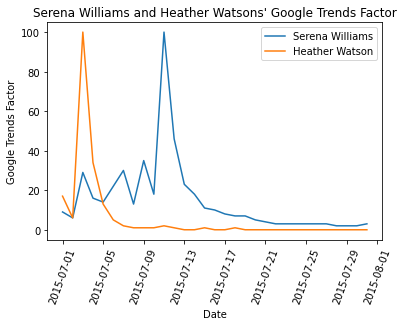

In [75]:
Serena = pd.read_csv("players/Serena Williams/2015_7_Serena Williams.csv")
Heather = pd.read_csv("players/Heather Watson/2015_7_Heather Watson.csv")
Serena["date"] = pd.to_datetime(Serena["date"])
Heather["date"] = pd.to_datetime(Heather["date"])
plt.plot(Serena["date"],Serena["Serena Williams"],label = "Serena Williams")
plt.plot(Heather["date"],Heather["Heather Watson"],label = "Heather Watson")
plt.title("Serena Williams and Heather Watsons' Google Trends Factor")
plt.xlabel("Date")
plt.ylabel("Google Trends Factor")
plt.xticks(rotation=70)
plt.legend()
plt.show()

In [238]:
    monthly = pd.read_csv("players 2014-2022/{}.csv".format(player))
    daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(player,year,month,player))
    monthly["date"] = pd.to_datetime(monthly["date"])
    monthly.loc[monthly["date"]=="{}-{}-01".format(year,month)]
    monthly = monthly[monthly["date"]<="{}-{}-01".format(year,month)]
    monthly = monthly[monthly["date"]>="{}-{}-01".format(prev_year,month)]
    max_month = monthly["{}".format(player)].max()
    month_scaler = 100/max_month
    monthly["{}".format(player)] = monthly["{}".format(player)]*month_scaler
    daily["date"] = pd.to_datetime(daily["date"])
    daily_mean = daily["{}".format(player)].mean()
    daily_scaler = float(monthly.loc[monthly["date"]=="{}-{}-01".format(year,month)]["{}".format(player)])/daily_mean
    daily["{}".format(player)] = daily["{}".format(player)]*daily_scaler
    player_GB = float(daily.loc[daily["date"]=="{}-{}-{}".format(year,month,day)]["{}".format(player)])

In [188]:
daily = pd.read_csv("players/Lourdes Domínguez Lino/2015_7_Lourdes Domínguez Lino.csv")
type(daily)

pandas.core.frame.DataFrame

## Google vs Wiki

In [18]:
google_df["wikibuzz"].describe()

count    18840.000000
mean        -0.000032
std          1.401425
min         -6.931947
25%         -0.849178
50%          0.000000
75%          0.849178
max          6.931947
Name: wikibuzz, dtype: float64

In [143]:
google_df["googlebuzz"].describe()

count    18838.000000
mean       -23.098008
std        208.248914
min      -3049.041096
25%        -47.262884
50%          0.000000
75%         23.974504
max       3004.952830
Name: googlebuzz, dtype: float64

In [20]:
google_df["googlebuzz"].corr(df["wikibuzz"])

1.9978333695259254e-05

In [325]:
google_df = pd.read_csv("GoogleBuzzDF.csv")

In [326]:
sort_g = google_df.sort_values("googlebuzz")
#google_df

In [327]:
sort_g["googlebuzz"] = np.where(sort_g["win"] == 0, -sort_g["googlebuzz"], sort_g["googlebuzz"])
sort_g["originalgooglebuzz"] = np.where(sort_g["win"] == 0, -sort_g["originalgooglebuzz"], sort_g["originalgooglebuzz"])

In [328]:
google_df = sort_g

In [329]:
google_df

,Unnamed: 0,match_id,player,opponent,year,month,day,rankdiff,rankdist,wikibuzz,inv_bet365,inv_avg,inv_max,encoded_tournament,win,googlebuzz,originalgooglebuzz
18622,18622,13904,Serena Williams,Alison Riske,2019.0,7.0,9.0,-45.0,-0.081818,-5.254555,0.800000,0.787402,0.769231,120,1,-3049.041096,-4.089027
18626,18626,13904,Alison Riske,Serena Williams,2019.0,7.0,9.0,45.0,0.081818,5.254555,0.250000,0.259067,0.238095,120,0,3049.041096,4.089027
13521,13521,11724,Madison Keys,Yulia Putintseva,2018.0,6.0,5.0,-85.0,-0.066719,-1.378303,0.781250,0.787402,0.769231,40,1,-2975.147929,-4.754310
13523,13523,11724,Yulia Putintseva,Madison Keys,2018.0,6.0,5.0,85.0,0.066719,1.378303,0.266667,0.258398,0.238095,40,0,2975.147929,4.754310
18624,18624,13902,Johanna Konta,Barbora Strycova,2019.0,7.0,9.0,-36.0,-0.037037,3.048605,0.735294,0.714286,0.689655,120,0,2817.177119,2.612339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20927,20927,4139,Ekaterina Alexandrova,Kiki Bertens,2020.0,2.0,15.0,20.0,0.089286,1.323982,0.500000,0.483092,0.454545,70,0,NaN,NaN
20928,20928,4141,Patricia Maria Tig,Magda Linette,2020.0,2.0,15.0,63.0,0.014286,-0.517943,0.381679,0.396825,0.378788,108,0,NaN,NaN
20929,20929,4142,Maria Sakkari,Elena Rybakina,2020.0,2.0,15.0,-4.0,-0.007619,-1.612937,0.421941,0.431035,0.408163,70,0,NaN,NaN
20930,20930,4143,Kiki Bertens,Elena Rybakina,2020.0,2.0,16.0,-17.0,-0.085000,-2.935837,0.636943,0.641026,0.621118,70,1,NaN,NaN


In [253]:
sort_g.isna().sum()

Unnamed: 0               0
match_id                 0
player                   0
opponent                 0
year                     0
month                    0
day                      0
rankdiff                 0
rankdist                 0
wikibuzz                 0
inv_bet365               0
inv_avg                  0
inv_max                  0
encoded_tournament       0
win                      0
googlebuzz            2092
originalgooglebuzz    2092
dtype: int64

<AxesSubplot:ylabel='Density'>

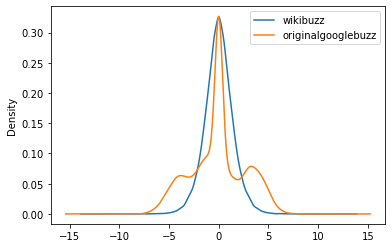

In [151]:
pd.DataFrame(google_df[["wikibuzz","originalgooglebuzz"]]).plot(kind='density')
#pd.DataFrame(google_df["originalgooglebuzz"]).plot(kind='density')

In [286]:
google_df

,Unnamed: 0,match_id,player,opponent,year,month,day,rankdiff,rankdist,wikibuzz,inv_bet365,inv_avg,inv_max,encoded_tournament,win,googlebuzz,originalgooglebuzz
0,0,12773,Casey Dellacqua,Elina Svitolina,2015.0,7.0,2.0,44.0,0.042430,0.000000,0.546448,0.537634,0.518135,120,1,5.113658,0.121761
1,1,12774,Camila Giorgi,Lara Arruabarrena,2015.0,7.0,2.0,-53.0,-0.019485,0.000000,0.900901,0.892857,0.877193,120,1,72.535035,4.297762
2,2,12775,Olga Govortsova,Alize Cornet,2015.0,7.0,2.0,95.0,0.028840,0.000000,0.476190,0.465116,0.444444,120,1,-43.494898,-3.795375
3,3,12776,Jelena Jankovic,Evgeniya Rodina,2015.0,7.0,2.0,-71.0,-0.023432,0.000000,0.819672,0.813008,0.793651,120,1,57.328767,4.066095
4,4,12777,Angelique Kerber,Anastasia Pavlyuchenkova,2015.0,7.0,2.0,-32.0,-0.076190,0.000000,0.862069,0.877193,0.847458,120,1,24.371069,3.233610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20927,20927,4139,Ekaterina Alexandrova,Kiki Bertens,2020.0,2.0,15.0,20.0,0.089286,1.323982,0.500000,0.483092,0.454545,70,0,NaN,NaN
20928,20928,4141,Patricia Maria Tig,Magda Linette,2020.0,2.0,15.0,63.0,0.014286,-0.517943,0.381679,0.396825,0.378788,108,0,NaN,NaN
20929,20929,4142,Maria Sakkari,Elena Rybakina,2020.0,2.0,15.0,-4.0,-0.007619,-1.612937,0.421941,0.431035,0.408163,70,0,NaN,NaN
20930,20930,4143,Kiki Bertens,Elena Rybakina,2020.0,2.0,16.0,-17.0,-0.085000,-2.935837,0.636943,0.641026,0.621118,70,1,NaN,NaN


In [173]:
winner_df = google_df[google_df["win"]==1]
loser_df = google_df[google_df["win"]==0]

In [166]:
x = pd.DataFrame()


In [187]:
x = list(winner_df["wikibuzz"])
y = list(loser_df["wikibuzz"])
win_lose = pd.DataFrame({"Winner":x,"Loser":y})
win_lose

,Winner,Loser
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
9414,-1.862187,1.862187
9415,-0.651621,0.651621
9416,1.061726,-1.061726
9417,2.006226,-2.006226


In [317]:
x = list(winner_df["wikibuzz"])
y = list(loser_df["wikibuzz"])
win_lose = pd.DataFrame({"Winner":x,"Loser":y})
win_lose

,Winner,Loser
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
9414,-1.862187,1.862187
9415,-0.651621,0.651621
9416,1.061726,-1.061726
9417,2.006226,-2.006226


<AxesSubplot:ylabel='Density'>

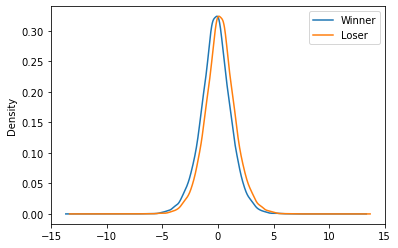

In [318]:
pd.DataFrame(win_lose[["Winner","Loser"]]).plot(kind='density')

<AxesSubplot:ylabel='Density'>

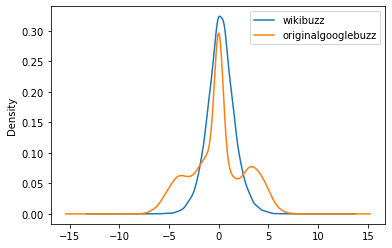

In [154]:
pd.DataFrame(loser_df[["wikibuzz","originalgooglebuzz"]]).plot(kind='density')

In [276]:
density_df = google_df.dropna


In [282]:
def PreMatchBuzz(player,opponent,year,month,day,win):
    player,opponent,year,month,day,win = str(player),str(opponent),int(year),int(month),int(day),int(win)
    prev_year = year-1
    if day == 1:
        if month == 1:
            month = 12
        else:
            month = month-1
        day = (monthrange(year, month))[1]
    else:
        day = day-1
    player_monthly = pd.read_csv("players 2014-2022/{}.csv".format(player))
    try:
        player_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(player,year,month,player))
    except:
        print("players/{}/{}_{}_{}.csv".format(player,year,month,player))
        return(np.nan)
    try:
        player_monthly["date"] = pd.to_datetime(player_monthly["date"])
    except:
        return(np.nan)
    player_monthly.loc[player_monthly["date"]=="{}-{}-01".format(year,month)]
    player_monthly = player_monthly[player_monthly["date"]<="{}-{}-01".format(year,month)]
    player_monthly = player_monthly[player_monthly["date"]>="{}-{}-01".format(prev_year,month)]
    player_max_month = player_monthly["{}".format(player)].max()
    try:
        player_month_scaler = 100/player_max_month
    except:
        return(np.nan)
    player_monthly["{}".format(player)] = player_monthly["{}".format(player)]*player_month_scaler
    try: 
        player_daily["date"] = pd.to_datetime(player_daily["date"])
    except:
        return(np.nan)
    player_daily_mean = player_daily["{}".format(player)].mean()
    try:
        player_daily_scaler = float(player_monthly.loc[player_monthly["date"]=="{}-{}-01".format(year,month)]["{}".format(player)])/player_daily_mean
    except:
        print(player,opponent,year,month,day)
        return(np.nan)
    player_daily["{}".format(player)] = player_daily["{}".format(player)]*player_daily_scaler
    player_GB = float(player_daily.loc[player_daily["date"]=="{}-{}-{}".format(year,month,day)]["{}".format(player)])
    
    opp_monthly = pd.read_csv("players 2014-2022/{}.csv".format(opponent))
    try:
        opp_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
    except:
        print("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
        return(np.nan)
    try:
        opp_monthly["date"] = pd.to_datetime(opp_monthly["date"])
    except:
        return(np.nan)
    opp_monthly.loc[opp_monthly["date"]=="{}-{}-01".format(year,month)]
    opp_monthly = opp_monthly[opp_monthly["date"]<="{}-{}-01".format(year,month)]
    opp_monthly = opp_monthly[opp_monthly["date"]>="{}-{}-01".format(prev_year,month)]
    opp_max_month = opp_monthly["{}".format(opponent)].max()
    try:
        opp_month_scaler = 100/opp_max_month
    except:
        return(np.nan)
    opp_monthly["{}".format(opponent)] = opp_monthly["{}".format(opponent)]*opp_month_scaler
    try:
        opp_daily["date"] = pd.to_datetime(opp_daily["date"])
    except:
        return(np.nan)
    opp_daily_mean = opp_daily["{}".format(opponent)].mean()
    opp_daily_scaler = float(opp_monthly.loc[opp_monthly["date"]=="{}-{}-01".format(year,month)]["{}".format(opponent)])/opp_daily_mean
    opp_daily["{}".format(opponent)] = opp_daily["{}".format(opponent)]*opp_daily_scaler
    opponent_GB = float(opp_daily.loc[opp_daily["date"]=="{}-{}-{}".format(year,month,day)]["{}".format(opponent)])
    GoogleBuzz = (player_GB)
    return(GoogleBuzz)

In [288]:

google_df["PreMatchBuzz"] = [PreMatchBuzz(player,opponent,year,month,day,win) for player,opponent,year,month,day,win in zip((google_df["player"]),(google_df["opponent"]),(google_df["year"]),(google_df["month"]),(google_df["day"]),(google_df["win"]))]

Nao Hibino Arina Rodionova 2020 2 9
Peangtarn Plipuech Chloe Paquet 2020 2 9
Anastasia Potapova Liudmila Samsonova 2020 2 9
Maria Sakkari Vitalia Diatchenko 2020 2 9
Storm Sanders Ulrikke Eikeri 2020 2 9
Arina Rodionova Nao Hibino 2020 2 9
Chloe Paquet Peangtarn Plipuech 2020 2 9
Liudmila Samsonova Anastasia Potapova 2020 2 9
Vitalia Diatchenko Maria Sakkari 2020 2 9
Ulrikke Eikeri Storm Sanders 2020 2 9
Ekaterina Alexandrova Daria Kasatkina 2020 2 10
Oceane Dodin Viktoria Kuzmova 2020 2 10
Fiona Ferro Caroline Garcia 2020 2 10
Barbara Haas Chihiro Muramatsu 2020 2 10
Katarzyna Kawa Ankita Raina 2020 2 10
Veronika Kudermetova Yulia Putintseva 2020 2 10
Svetlana Kuznetsova Jennifer Brady 2020 2 10
Ajla Tomljanovic Marketa Vondrousova 2020 2 10
Alison Van Uytvanck Kristina Mladenovic 2020 2 10
Donna Vekic Kristie Ahn 2020 2 10
Lin Zhu Varvara Flink 2020 2 10
Daria Kasatkina Ekaterina Alexandrova 2020 2 10
Viktoria Kuzmova Oceane Dodin 2020 2 10
Caroline Garcia Fiona Ferro 2020 2 10
Chihi

In [293]:
prebuzz = google_df.dropna()
prebuzz

,Unnamed: 0,match_id,player,opponent,year,month,day,rankdiff,rankdist,wikibuzz,inv_bet365,inv_avg,inv_max,encoded_tournament,win,googlebuzz,originalgooglebuzz,PreMatchBuzz
0,0,12773,Casey Dellacqua,Elina Svitolina,2015.0,7.0,2.0,44.0,0.042430,0.000000,0.546448,0.537634,0.518135,120,1,5.113658,0.121761,43.606138
1,1,12774,Camila Giorgi,Lara Arruabarrena,2015.0,7.0,2.0,-53.0,-0.019485,0.000000,0.900901,0.892857,0.877193,120,1,72.535035,4.297762,72.535035
2,2,12775,Olga Govortsova,Alize Cornet,2015.0,7.0,2.0,95.0,0.028840,0.000000,0.476190,0.465116,0.444444,120,1,-43.494898,-3.795375,0.000000
3,3,12776,Jelena Jankovic,Evgeniya Rodina,2015.0,7.0,2.0,-71.0,-0.023432,0.000000,0.819672,0.813008,0.793651,120,1,57.328767,4.066095,57.328767
4,4,12777,Angelique Kerber,Anastasia Pavlyuchenkova,2015.0,7.0,2.0,-32.0,-0.076190,0.000000,0.862069,0.877193,0.847458,120,1,24.371069,3.233610,24.371069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20845,20845,2541,Garbiñe Muguruza,Simona Halep,2020.0,1.0,30.0,29.0,0.302083,2.006226,0.434783,0.421941,0.395257,9,1,347.029136,1.368110,464.553314
20846,20846,2540,Ashleigh Barty,Sofia Kenin,2020.0,1.0,30.0,-14.0,-0.933333,-1.061726,0.781250,0.769231,0.740741,9,0,52.953678,0.420586,100.278261
20847,20847,2541,Simona Halep,Garbiñe Muguruza,2020.0,1.0,30.0,-29.0,-0.302083,-2.006226,0.621118,0.625000,0.606061,9,0,347.029136,1.368110,117.524178
20848,20848,4086,Sofia Kenin,Garbiñe Muguruza,2020.0,2.0,1.0,-17.0,-0.035417,0.636725,0.381679,0.390625,0.370370,9,1,14.130899,0.040665,353.612167


In [301]:
result = prebuzz.copy()

In [302]:
max_value = prebuzz["PreMatchBuzz"].max()
min_value = prebuzz["PreMatchBuzz"].min()
result["PreMatchBuzz"] = (prebuzz["PreMatchBuzz"]- min_value) / (max_value - min_value)

In [303]:
prebuzz["ScaledBuzz"] = result["PreMatchBuzz"] 

In [304]:
prebuzz_win = prebuzz[prebuzz["win"]==1]
prebuzz_lose = prebuzz[prebuzz["win"]==0]

In [324]:
google_df.sort_values("originalgooglebuzz")

,Unnamed: 0,match_id,player,opponent,year,month,day,rankdiff,rankdist,wikibuzz,inv_bet365,inv_avg,inv_max,encoded_tournament,win,googlebuzz,originalgooglebuzz,PreMatchBuzz
19452,19452,18127,Anna Danilina,Fangzhou Liu,2019.0,9.0,9.0,139.0,0.001315,2.799988,0.381679,0.380228,0.341297,61,0,-2290.076336,-7.736777,2290.076336
19439,19439,18127,Fangzhou Liu,Anna Danilina,2019.0,9.0,9.0,-139.0,-0.001315,-2.799988,0.694444,0.675676,0.649351,61,1,-2290.076336,-7.736777,0.000000
18938,18938,15937,Anastasia Potapova,Belinda Bencic,2019.0,8.0,5.0,63.0,0.070000,1.365573,0.294118,0.308642,0.289017,95,0,-1847.682119,-7.522228,1847.682119
18928,18928,15937,Belinda Bencic,Anastasia Potapova,2019.0,8.0,5.0,-63.0,-0.070000,-1.365573,0.769231,0.746269,0.719424,95,1,-1847.682119,-7.522228,0.000000
11571,11571,1837,Magdalena Frech,Carla Suárez Navarro,2018.0,1.0,15.0,124.0,0.019506,1.124999,0.307692,0.326797,0.306748,9,0,-1441.860465,-7.274383,1441.860465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20927,20927,4139,Ekaterina Alexandrova,Kiki Bertens,2020.0,2.0,15.0,20.0,0.089286,1.323982,0.500000,0.483092,0.454545,70,0,NaN,NaN,NaN
20928,20928,4141,Patricia Maria Tig,Magda Linette,2020.0,2.0,15.0,63.0,0.014286,-0.517943,0.381679,0.396825,0.378788,108,0,NaN,NaN,NaN
20929,20929,4142,Maria Sakkari,Elena Rybakina,2020.0,2.0,15.0,-4.0,-0.007619,-1.612937,0.421941,0.431035,0.408163,70,0,NaN,NaN,NaN
20930,20930,4143,Kiki Bertens,Elena Rybakina,2020.0,2.0,16.0,-17.0,-0.085000,-2.935837,0.636943,0.641026,0.621118,70,1,NaN,NaN,NaN


(-200.0, 400.0)

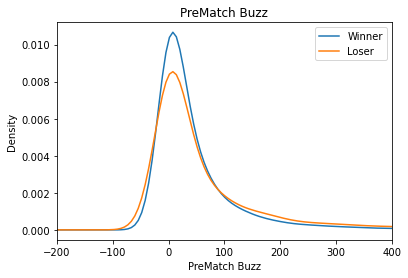

In [316]:


x = list(prebuzz_win["PreMatchBuzz"])
y = list(prebuzz_lose["PreMatchBuzz"])
win_lose = pd.DataFrame({"Winner":x,"Loser":y})
pd.DataFrame(win_lose[["Winner","Loser"]]).plot(kind='density')
plt.title("PreMatch Buzz")
plt.xlabel("PreMatch Buzz")
plt.xlim(-200, 400)

(-15.0, 15.0)

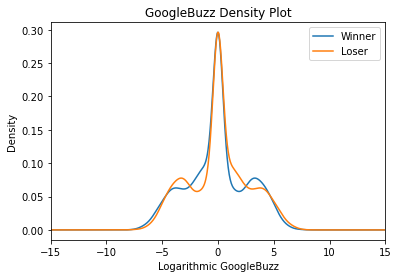

In [348]:
google_df_win = google_df[google_df["win"]==1]
google_df_lose = google_df[google_df["win"]==0]
x = list(google_df_win["originalgooglebuzz"])
y = list(google_df_lose["originalgooglebuzz"])
win_lose = pd.DataFrame({"Winner":x,"Loser":y})
pd.DataFrame(win_lose[["Winner","Loser"]]).plot(kind='density')
plt.title("GoogleBuzz Density Plot")
plt.xlabel("Logarithmic GoogleBuzz")
#plt.axvline(x = -0.062497, color = 'b', label = 'Winner Mean')
#plt.axvline(x =  0.061942, color = 'r', label = 'Loser Mean')
plt.xlim([-15,15])

In [333]:
print(google_df_win["originalgooglebuzz"].describe())
print(google_df_lose["originalgooglebuzz"].describe())

count    9420.000000
mean       -0.062497
std         2.700617
min        -7.736777
25%        -1.663140
50%         0.000000
75%         1.582590
max         7.576097
Name: originalgooglebuzz, dtype: float64
count    9420.000000
mean        0.061942
std         2.700003
min        -7.576097
25%        -1.582590
50%        -0.000000
75%         1.662099
max         7.736777
Name: originalgooglebuzz, dtype: float64


## Betting time

In [21]:
def probability(const_p,odds_p,rankdist_p,wikibuzz_p,year_p,tournament_p,odds,rankdist,wikibuzz,google_p = 0,googlebuzz = 0): #to be used in conjuncture with a df
    return(const_p + (odds_p)*odds + rankdist_p*rankdist + wikibuzz_p*wikibuzz + google_p*googlebuzz)

def kelly_crit(probability,inv_odds):
               return(max((probability-((1-probability)/((1/inv_odds) - 1)),0)))
    
def profit(kelly,inv_odds,win):
    decimal_odds = 1/inv_odds
    if win == 1: #match won
        return(kelly*decimal_odds - kelly) #profits - inital investment
    elif win == 0: #match lost
        return(-kelly) # - initial investment

In [22]:
from linearmodels import PanelOLS

In [76]:
#google_df = df

In [432]:
google_df = sort_g

In [393]:
#google_df[google_df["player"]=="Polona Hercog"]
google_df.loc[google_df["match_id"]==5883]
google_df = google_df.drop(16916,axis = 0)
#google_df = google_df.drop(16762,axis = 0)

In [394]:
train_data = google_df[google_df["year"]<2019]
test_data = google_df[google_df["year"]>=2019]
#train_data = train_data.set_index(['match_id'], append=True)
#test_data = test_data.set_index(['match_id'], append=True)

In [396]:
test_data = test_data.dropna()
test_data[test_data["match_id"]==5883]
#test_data = test_data.drop(16916, axis = 0)
test_data = test_data.drop(16928, axis = 0)
test_data = test_data.drop(20183, axis = 0)
test_data = test_data.drop(18620, axis = 0)


In [1]:
test_data.sort_values("profit")

NameError: name 'test_data' is not defined

In [397]:
train_data = train_data.set_index(['match_id'], append=True)
test_data = test_data.set_index(['match_id'], append=True)


In [398]:
test_data = test_data.sort_index()

## Unusual Betting

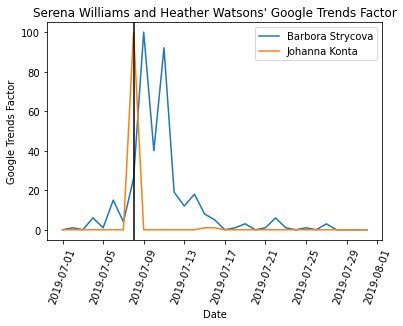

In [451]:
Strycova = pd.read_csv("players/Barbora Strycova/2019_7_Barbora Strycova.csv")
Konta = pd.read_csv("players/Johanna Konta/2019_7_Johanna Konta.csv")
Strycova["date"] = pd.to_datetime(Strycova["date"])
Konta["date"] = pd.to_datetime(Konta["date"])
plt.plot(Strycova["date"],Strycova["Barbora Strycova"],label = "Barbora Strycova")
plt.plot(Konta["date"],Konta["Johanna Konta"],label = "Johanna Konta")
plt.title("Serena Williams and Heather Watsons' Google Trends Factor")
plt.xlabel("Date")
plt.ylabel("Google Trends Factor")
plt.legend()
plt.xticks(rotation=70)
plt.axvline(dt.datetime(2019, 7, 8),color = "black")
#plt.plot_date(x = '2019-07-08', y = 0)
#plt.vline(datetime.strptime("2019-7-8"))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

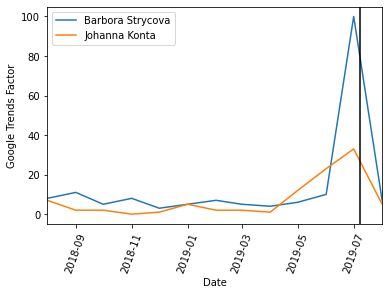

In [455]:
yearly_konta = pd.read_csv("players 2014-2022/Johanna Konta.csv")
yearly_strycova = pd.read_csv("players 2014-2022/Barbora Strycova.csv")
yearly_konta["date"] = pd.to_datetime(yearly_konta["date"])
yearly_strycova["date"] = pd.to_datetime(yearly_strycova["date"])
plt.plot(yearly_strycova["date"],yearly_strycova["Barbora Strycova"],label = "Barbora Strycova")
plt.plot(yearly_konta["date"],yearly_konta["Johanna Konta"],label = "Johanna Konta")
plt.xlabel("Date")
plt.ylabel("Google Trends Factor")
plt.legend()
plt.xticks(rotation=70)
plt.xlim([dt.datetime(2018, 8, 1),dt.datetime(2019, 8, 1)])
plt.axvline(dt.datetime(2019, 7, 8),color = "black")
plt.show

## Original Models but with Abs GoogleBuzz


no of bets: 330
profit: 0.30247023442083176
Mean overround (%): 5.336459320706122
count    4705.000000
mean        0.000059
std         0.027503
min        -0.531131
25%         0.000000
50%        -0.000000
75%        -0.000000
max         0.479522
Name: profit, dtype: float64
ROI (%): 0.8968656687788235


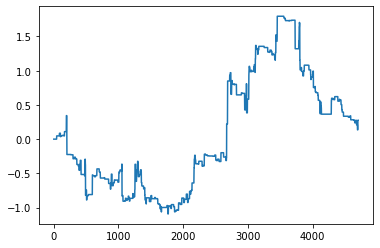

In [399]:
exog_vars = train_data[["inv_avg","rankdist","googlebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False)
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["googlebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_avg"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_avg"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_avg"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


In [1]:
exog_vars = train_data[["inv_avg","rankdist","googlebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["googlebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_max"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_max"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_max"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))

NameError: name 'train_data' is not defined


no of bets: 381
profit: 0.13287596338276159
Mean overround (%): 6.446769488095794
count    4705.000000
mean        0.000026
std         0.026237
min        -0.538539
25%        -0.000000
50%        -0.000000
75%        -0.000000
max         0.410971
Name: profit, dtype: float64
ROI (%): 0.4136054524488397


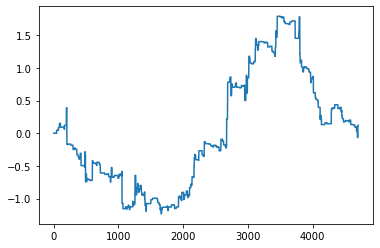

In [401]:
exog_vars = train_data[["inv_avg","rankdist","googlebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["googlebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_bet365"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 298
profit: 0.13198580696277845
Mean overround (%): 6.446769488095794
count    4705.000000
mean        0.000026
std         0.021471
min        -0.508173
25%         0.000000
50%        -0.000000
75%        -0.000000
max         0.413127
Name: profit, dtype: float64
ROI (%): 0.5507609605057251


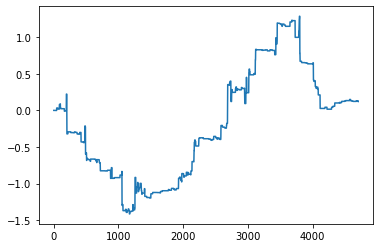

In [402]:
exog_vars = train_data[["inv_avg","googlebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],0,x["googlebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_bet365"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
#plt.plot(list(((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100).cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 122
profit: -0.37715167675385136
Mean overround (%): 6.446769488095794
count    4705.000000
mean       -0.000073
std         0.008039
min        -0.077696
25%         0.000000
50%         0.000000
75%        -0.000000
max         0.194253
Name: profit, dtype: float64
ROI (%): -10.63810200409706


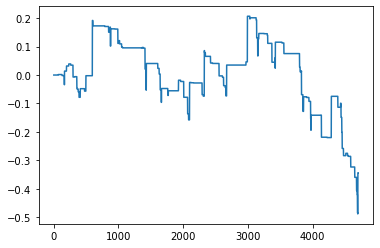

In [403]:
exog_vars = train_data[["inv_avg","rankdist"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],0,0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_bet365"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))

## Original models With Log GoogleBuzz (Original Google Buzz)


no of bets: 107
profit: -0.08709607608184794
Mean overround (%): 5.336459320706122
count    4705.000000
mean       -0.000017
std         0.009811
min        -0.085858
25%        -0.000000
50%         0.000000
75%        -0.000000
max         0.354435
Name: profit, dtype: float64
ROI (%): -2.1936161428961043


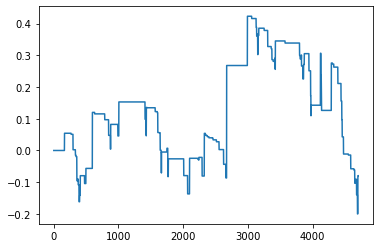

In [404]:
exog_vars = train_data[["inv_avg","rankdist","originalgooglebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False)
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["originalgooglebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_avg"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_avg"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_avg"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 2075
profit: 0.17147703422210347
Mean overround (%): -0.18780130184333776
count    4705.000000
mean        0.000033
std         0.032031
min        -0.218402
25%         0.000000
50%         0.000000
75%        -0.000000
max         0.559683
Name: profit, dtype: float64
ROI (%): 0.2864525878241375


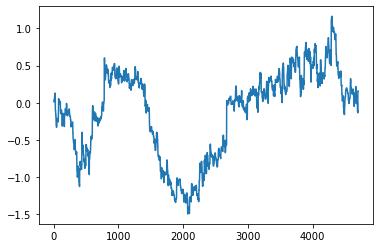

In [405]:
exog_vars = train_data[["inv_avg","rankdist","originalgooglebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["originalgooglebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_max"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_max"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_max"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 208
profit: -0.3528820242002105
Mean overround (%): 6.446769488095794
count    4705.000000
mean       -0.000068
std         0.010082
min        -0.114580
25%         0.000000
50%         0.000000
75%        -0.000000
max         0.256121
Name: profit, dtype: float64
ROI (%): -6.742700880467911


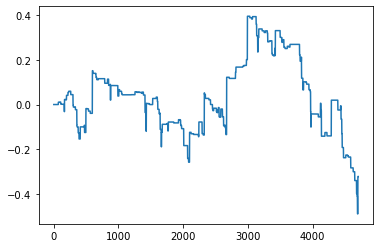

In [406]:
exog_vars = train_data[["inv_avg","rankdist","originalgooglebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["originalgooglebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_bet365"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 109
profit: -0.0685244391307314
Mean overround (%): 6.446769488095794
count    4705.000000
mean       -0.000013
std         0.001999
min        -0.033379
25%        -0.000000
50%         0.000000
75%        -0.000000
max         0.043287
Name: profit, dtype: float64
ROI (%): -7.539553154026423


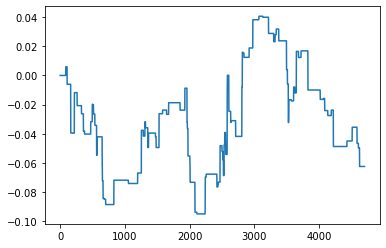

In [407]:
exog_vars = train_data[["inv_avg","originalgooglebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],0,x["originalgooglebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_bet365"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))

## Combined Models

In [211]:
test_data.sort_values("profit")

,,player,opponent,year,month,day,rankdiff,rankdist,wikibuzz,inv_bet365,inv_avg,inv_max,encoded_tournament,win,googlebuzz,avg_prob,kelly,profit
,match_id,,,,,,,,,,,,,,,,,
15978,2063,Madison Brengle,Alison Van Uytvanck,2019.0,1.0,8.0,38.0,0.008372,-1.047331,0.454545,0.500000,0.444444,49,0,0.000000,0.472767,0.033405,-0.033405
18000,10148,Veronika Kudermetova,Kaia Kanepi,2019.0,5.0,31.0,-20.0,-0.003342,1.052582,0.421941,0.462963,0.414938,40,0,-33.255876,0.436947,0.025960,-0.025960
18343,12072,Yulia Putintseva,Kiki Bertens,2019.0,6.0,25.0,35.0,0.224359,1.469051,0.285714,0.317460,0.280899,36,0,-68.339950,0.296159,0.014623,-0.014623
17271,7598,Cagla Buyukakcay,Svetlana Kuznetsova,2019.0,4.0,23.0,158.0,0.006298,1.328187,0.181818,0.210970,0.178571,56,0,0.000000,0.193050,0.013728,-0.013728
16441,3982,Fatma Al Nabhani,Kristina Mladenovic,2019.0,2.0,17.0,339.0,0.012462,-0.263417,0.047619,0.073206,0.047619,35,0,17.753623,0.059712,0.012698,-0.012698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18508,13846,Danielle Collins,Anastasija Sevastova,2019.0,7.0,3.0,22.0,0.053922,0.382699,0.266667,0.291545,0.266667,120,1,-14.711864,0.271039,0.005963,0.016398
15855,2006,Ajla Tomljanovic,Johanna Konta,2019.0,1.0,2.0,9.0,0.005288,-2.318236,0.307692,0.335570,0.307692,22,1,97.999805,0.313563,0.008480,0.019081
17844,10071,Aliona Bolsova,Vera Zvonareva,2019.0,5.0,27.0,59.0,0.005521,4.553877,0.500000,0.546448,0.487805,40,1,45.857988,0.517684,0.035368,0.035368


,,player,opponent,year,month,day,rankdiff,rankdist,wikibuzz,inv_bet365,inv_avg,inv_max,encoded_tournament,win,googlebuzz,avg_prob,kelly,profit
,match_id,,,,,,,,,,,,,,,,,
18000,10148,Veronika Kudermetova,Kaia Kanepi,2019.0,5.0,31.0,-20.0,-0.003342,1.052582,0.421941,0.462963,0.414938,40,0,-1.212894,0.437662,0.027197,-0.027197
18343,12072,Yulia Putintseva,Kiki Bertens,2019.0,6.0,25.0,35.0,0.224359,1.469051,0.285714,0.317460,0.280899,36,0,-1.558097,0.297987,0.017182,-0.017182
16441,3982,Fatma Al Nabhani,Kristina Mladenovic,2019.0,2.0,17.0,339.0,0.012462,-0.263417,0.047619,0.073206,0.047619,35,0,0.000000,0.063301,0.016466,-0.016466
19530,18175,Varvara Flink,Sara Sorribes Tormo,2019.0,9.0,12.0,68.0,0.005229,1.169106,0.307692,0.337838,0.303030,60,0,0.000000,0.317397,0.014018,-0.014018
17877,10078,Viktorija Golubic,Su-Wei Hsieh,2019.0,5.0,27.0,54.0,0.027342,0.875469,0.312500,0.342466,0.312500,40,0,0.000000,0.321841,0.013586,-0.013586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18508,13846,Danielle Collins,Anastasija Sevastova,2019.0,7.0,3.0,22.0,0.053922,0.382699,0.266667,0.291545,0.266667,120,1,0.000000,0.272947,0.008565,0.023552
15855,2006,Ajla Tomljanovic,Johanna Konta,2019.0,1.0,2.0,9.0,0.005288,-2.318236,0.307692,0.335570,0.307692,22,1,0.000000,0.315220,0.010873,0.024465
17844,10071,Aliona Bolsova,Vera Zvonareva,2019.0,5.0,27.0,59.0,0.005521,4.553877,0.500000,0.546448,0.487805,40,1,0.000000,0.517702,0.035404,0.035404


## Combined Models


no of bets: 541
profit: 0.2970149223815967
Mean overround (%): 5.336459320706122
count    4705.000000
mean        0.000058
std         0.031924
min        -0.608396
25%         0.000000
50%        -0.000000
75%        -0.000000
max         0.459276
Name: profit, dtype: float64
ROI (%): 0.6743895627356666


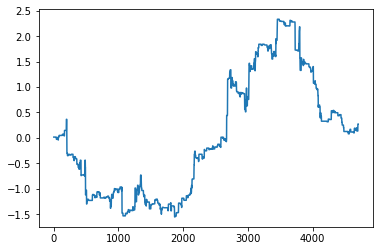

In [421]:
# abs avg SM
exog_vars = train_data[["inv_avg","rankdist","googlebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["wikibuzz"],0,0,odds,rankdist,wikibuzz,x["googlebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["wikibuzz"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_avg"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_avg"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_avg"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 321
profit: -0.5737897927955011
Mean overround (%): 5.336459320706122
count    4705.000000
mean       -0.000111
std         0.010551
min        -0.098994
25%         0.000000
50%         0.000000
75%         0.000000
max         0.338082
Name: profit, dtype: float64
ROI (%): -6.884689757921015


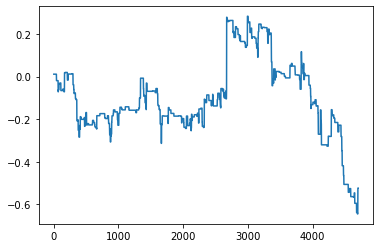

In [426]:
# log avg SM
exog_vars = train_data[["inv_avg","rankdist","originalgooglebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["wikibuzz"],0,0,odds,rankdist,wikibuzz,x["originalgooglebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["wikibuzz"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_avg"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_avg"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_avg"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 479
profit: -0.1253691826484334
Mean overround (%): 5.336459320706122
count    4705.000000
mean       -0.000024
std         0.028637
min        -0.583649
25%         0.000000
50%        -0.000000
75%        -0.000000
max         0.360023
Name: profit, dtype: float64
ROI (%): -0.32498744424896975


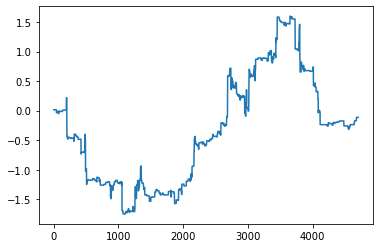

In [422]:
#abs avg RD
exog_vars = train_data[["inv_avg","googlebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],0,x["wikibuzz"],0,0,odds,0,wikibuzz,x["googlebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["wikibuzz"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_avg"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_avg"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_avg"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 250
profit: -0.590135962573177
Mean overround (%): 5.336459320706122
count    4705.000000
mean       -0.000114
std         0.006076
min        -0.088677
25%         0.000000
50%         0.000000
75%         0.000000
max         0.116919
Name: profit, dtype: float64
ROI (%): -10.520580083272224


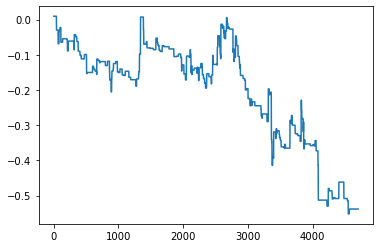

In [427]:
#log avg RD
exog_vars = train_data[["inv_avg","originalgooglebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],0,x["wikibuzz"],0,0,odds,0,wikibuzz,x["originalgooglebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["wikibuzz"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_avg"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_avg"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_avg"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 537
profit: 2.2857224648177366
Mean overround (%): -0.18780130184333776
count    4705.000000
mean        0.000443
std         0.031689
min        -0.555715
25%         0.000000
50%        -0.000000
75%         0.000000
max         0.527808
Name: profit, dtype: float64
ROI (%): 5.695664830999081


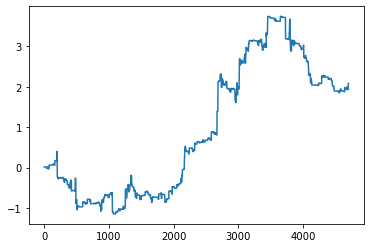

In [423]:
#abs Best SM
exog_vars = train_data[["inv_avg","rankdist","googlebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["wikibuzz"],0,0,odds,rankdist,wikibuzz,x["googlebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_max"],test_data["rankdist"],test_data["wikibuzz"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_max"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_max"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_max"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 316
profit: 0.012064131663841642
Mean overround (%): -0.18780130184333776
count    4705.000000
mean        0.000002
std         0.011011
min        -0.091896
25%         0.000000
50%         0.000000
75%         0.000000
max         0.386372
Name: profit, dtype: float64
ROI (%): 0.15875650987400292


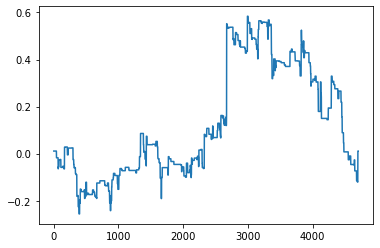

In [428]:
#log Best SM
exog_vars = train_data[["inv_avg","rankdist","originalgooglebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["wikibuzz"],0,0,odds,rankdist,wikibuzz,x["originalgooglebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_max"],test_data["rankdist"],test_data["wikibuzz"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_max"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_max"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_max"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 497
profit: 1.4467744389749704
count    4705.000000
mean        0.000280
std         0.028453
min        -0.535156
25%        -0.000000
50%         0.000000
75%         0.000000
max         0.408030
Name: profit, dtype: float64
ROI (%): 4.080519905370172


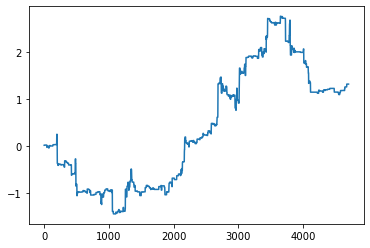

In [419]:
#abs best RD

exog_vars = train_data[["inv_avg","googlebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],0,x["wikibuzz"],0,0,odds,0,wikibuzz,x["googlebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_max"],test_data["rankdist"],test_data["wikibuzz"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_max"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_max"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 253
profit: -0.27898133242080597
count    4705.000000
mean       -0.000054
std         0.006393
min        -0.084589
25%         0.000000
50%         0.000000
75%         0.000000
max         0.136155
Name: profit, dtype: float64
ROI (%): -5.514563043215103


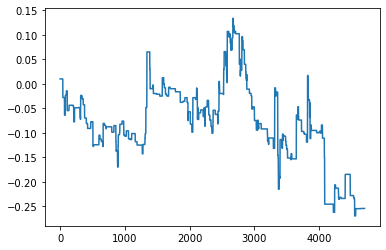

In [429]:
#log best RD

exog_vars = train_data[["inv_avg","originalgooglebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],0,x["wikibuzz"],0,0,odds,0,wikibuzz,x["originalgooglebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_max"],test_data["rankdist"],test_data["wikibuzz"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_max"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_max"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 541
profit: -0.15294480121488802
Mean overround (%): 6.446769488095794
count    4705.000000
mean       -0.000030
std         0.032197
min        -0.598618
25%         0.000000
50%        -0.000000
75%        -0.000000
max         0.426409
Name: profit, dtype: float64
ROI (%): -0.3388741794099426


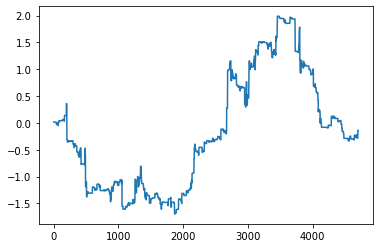

In [424]:
#abs 365 SD
exog_vars = train_data[["inv_avg","rankdist","googlebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["wikibuzz"],0,0,odds,rankdist,wikibuzz,x["googlebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_bet365"],test_data["rankdist"],test_data["wikibuzz"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_bet365"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 322
profit: -0.6215426847028853
Mean overround (%): 6.446769488095794
count    4705.000000
mean       -0.000120
std         0.010417
min        -0.099963
25%         0.000000
50%         0.000000
75%        -0.000000
max         0.314923
Name: profit, dtype: float64
ROI (%): -7.381693894253305


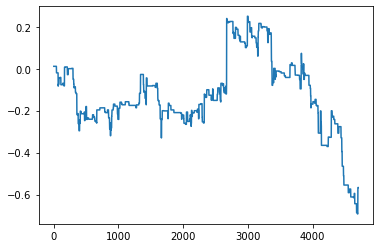

In [430]:
#log 365 SD
exog_vars = train_data[["inv_avg","rankdist","originalgooglebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["wikibuzz"],0,0,odds,rankdist,wikibuzz,x["originalgooglebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_bet365"],test_data["rankdist"],test_data["wikibuzz"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_bet365"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 477
profit: -0.5145595204047058
count    4705.000000
mean       -0.000100
std         0.028876
min        -0.574648
25%         0.000000
50%        -0.000000
75%        -0.000000
max         0.373420
Name: profit, dtype: float64
ROI (%): -1.3051910838210556


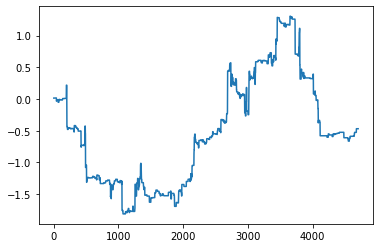

In [425]:
#abs 365 RD
exog_vars = train_data[["inv_avg","googlebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],0,x["wikibuzz"],0,0,odds,0,wikibuzz,x["googlebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_bet365"],test_data["rankdist"],test_data["wikibuzz"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 247
profit: -0.6153481969733494
count    4705.000000
mean       -0.000119
std         0.006034
min        -0.087934
25%         0.000000
50%         0.000000
75%         0.000000
max         0.108196
Name: profit, dtype: float64
ROI (%): -10.925863483528286


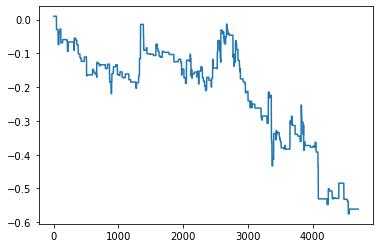

In [431]:
#log 365 RD
exog_vars = train_data[["inv_avg","originalgooglebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],0,x["wikibuzz"],0,0,odds,0,wikibuzz,x["originalgooglebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_bet365"],test_data["rankdist"],test_data["wikibuzz"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))